In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [7]:
# Define file paths for the datasets
file_path1 = '/Table1.txt'
file_path2 = '/Table2.txt'
file_path3 = '/Table3.txt'

In [8]:
# Load data
tables = [np.loadtxt(file_path) for file_path in [file_path1, file_path2, file_path3]]

for i, table in enumerate(tables, start=1):
    print(f"Shape of Table{i}: {table.shape}")


Shape of Table1: (67, 62)
Shape of Table2: (67, 62)
Shape of Table3: (67, 62)


In [10]:
# Load data
Table1 = np.loadtxt(file_path1)
Table2 = np.loadtxt(file_path2)
Table3 = np.loadtxt(file_path3)

In [11]:
datasets=[Table1,Table2,Table3]
for idx, table in enumerate(datasets, start=1):
    print(f"\nSummary statistics of Table{idx}:")
    print("Median is:", np.median(table))
    print("Mean is:", np.mean(table))
    print("Standard deviation is:", np.std(table))


Summary statistics of Table1:
Median is: 0.40392
Mean is: 0.4310921906596052
Standard deviation is: 0.2925868637049144

Summary statistics of Table2:
Median is: 0.383745
Mean is: 0.4254816297544535
Standard deviation is: 0.2992404698992661

Summary statistics of Table3:
Median is: 0.0
Mean is: 0.010730926817525277
Standard deviation is: 0.08482002177645241



Processing dataset: 1
Dimensions of original data: (67, 62)
Number of components explaining 95.0% of variance: 17
Utility: 0.9546446614645304
Mean Squared Error (MSE) for reconstructed data: 0.04535533853546995
Dimensions of data after PCA: (67, 17)


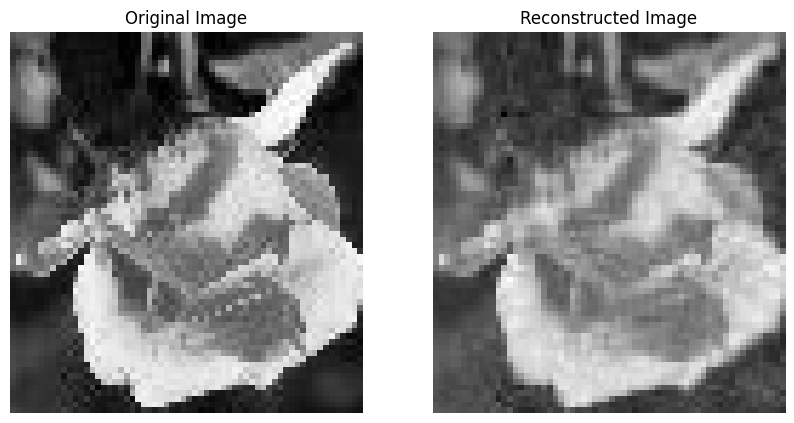


Processing dataset: 2
Dimensions of original data: (67, 62)
Number of components explaining 95.0% of variance: 25
Utility: 0.9511254772871948
Mean Squared Error (MSE) for reconstructed data: 0.048874522712805346
Dimensions of data after PCA: (67, 25)


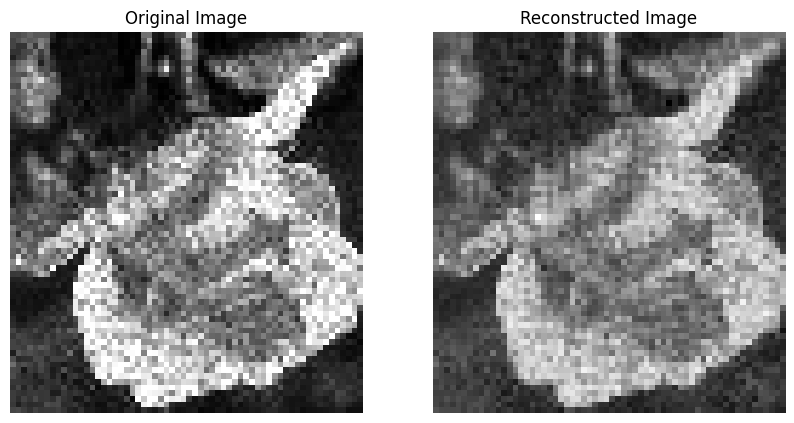


Processing dataset: 3
Dimensions of original data: (67, 62)
Number of components explaining 95.0% of variance: 38
Utility: 0.957544742489265
Mean Squared Error (MSE) for reconstructed data: 0.1309148571683323
Dimensions of data after PCA: (67, 38)


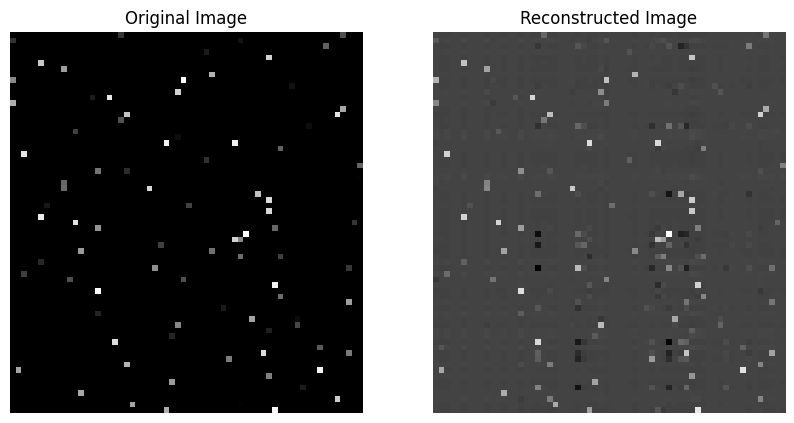

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define file paths for the datasets
file_paths = [
    '/Table1.txt',
    '/Table2.txt',
    '/Table3.txt'
]

# Function to load data
def get_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [list(map(float, line.split())) for line in lines]
    return np.array(data)

# Load datasets from file paths
datasets = [get_data(path) for path in file_paths]

# Lists to store original dimensions, PCA dimensions, utilities, and MSEs
original_dimensions = []
pca_dimensions = []
utilities = []
mses = []

# Loop over the datasets
for idx, data in enumerate(datasets, start=1):
    print("\nProcessing dataset:", idx)
    print("Dimensions of original data:", data.shape)
    original_dimensions.append(data.shape)

    # Standardize the features
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(data)

    # Compute covariance matrix
    cov_matrix = np.cov(data_standardized, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Compute explained variance ratio
    total_variance = np.sum(sorted_eigenvalues)
    explained_variance_ratio = sorted_eigenvalues / total_variance
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Calculate number of components explaining 95% of variance
    threshold = 0.95
    n_components_95 = np.argmax(cumulative_variance_ratio >= threshold) + 1
    print("Number of components explaining 95.0% of variance:", n_components_95)

    # Calculate utility
    utility = cumulative_variance_ratio[n_components_95 - 1]
    utilities.append(utility)
    print("Utility:", utility)

    # Project the data onto the selected components
    projected_data = np.dot(data_standardized, sorted_eigenvectors[:, :n_components_95])

    # Reconstruct the data
    reconstructed_data = np.dot(projected_data, sorted_eigenvectors[:, :n_components_95].T)

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((data_standardized - reconstructed_data) ** 2)
    mses.append(mse)
    print("Mean Squared Error (MSE) for reconstructed data:", mse)

    print("Dimensions of data after PCA:", projected_data.shape)
    pca_dimensions.append(projected_data.shape)

    # Reshape the reconstructed data to its original shape
    reconstructed_data = reconstructed_data.reshape(data.shape)

    # Invert the scaling to get reconstructed data in the original scale
    reconstructed_data = scaler.inverse_transform(reconstructed_data)

    # Plot original and reconstructed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(data, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_data, cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')
    
    plt.show()

# Plot dimensions for comparison
original_dims = [dim[1] for dim in original_dimensions]
pca_dims = [dim[1] for dim in pca_dimensions]



Table1: Original Dimensions: (67, 62)
Retained Dimension is: 17, Reconstruction Error is: 0.004444707374205004


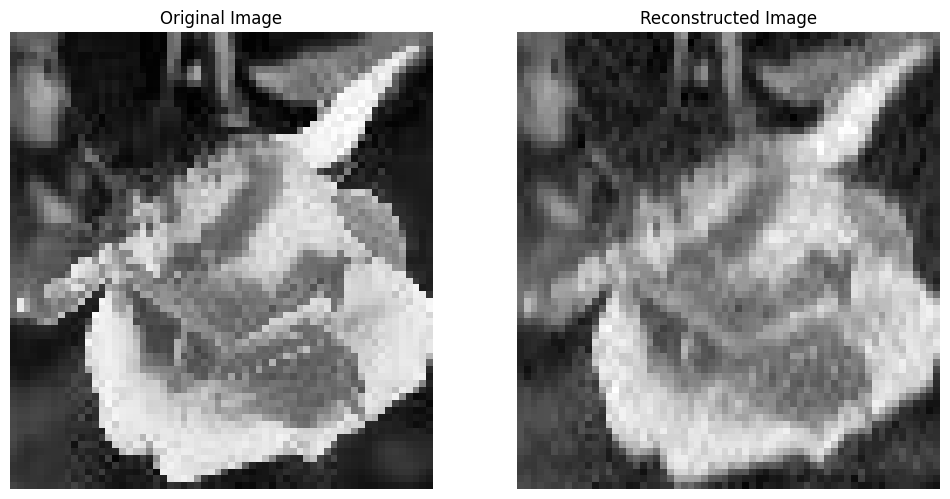

Table2: Original Dimensions: (67, 62)
Retained Dimension is: 20, Reconstruction Error is: 0.006447931457993709


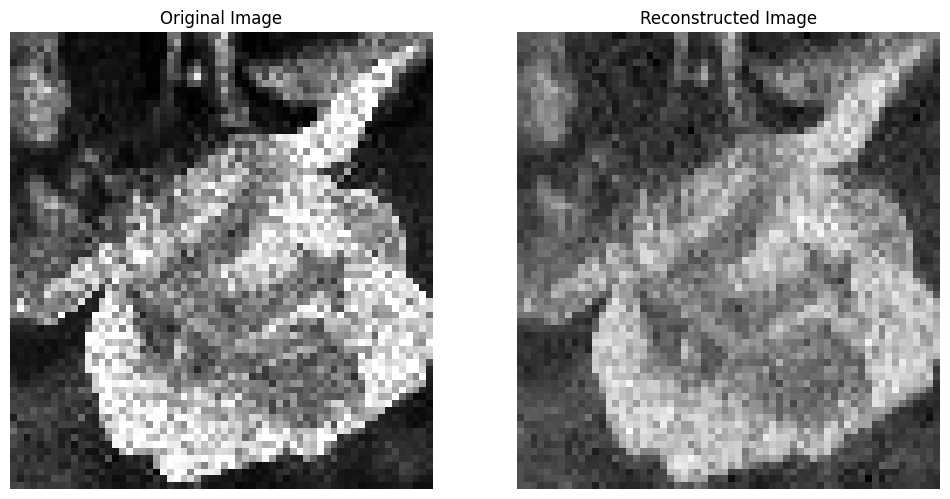

Table3: Original Dimensions: (67, 62)
Retained Dimension is: 47, Reconstruction Error is: 0.00017903008623298654


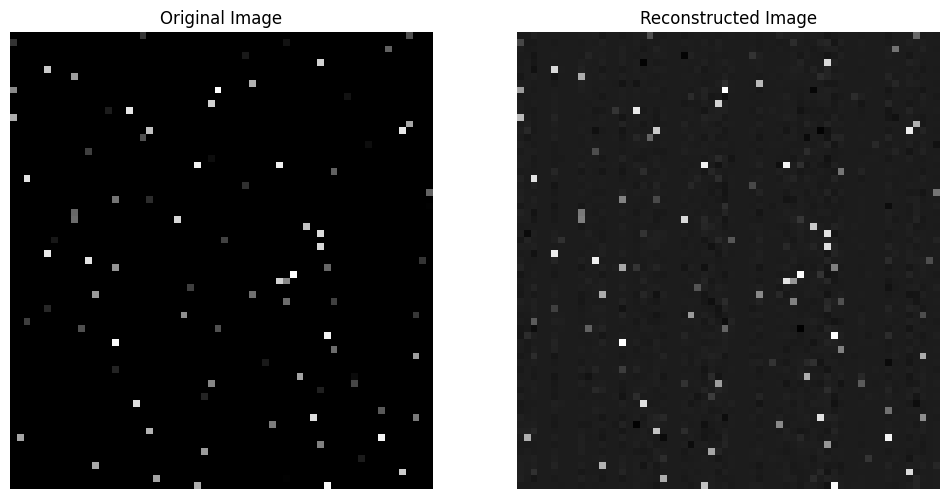

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

def get_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [list(map(float, line.split())) for line in lines]
    return np.array(data)

def dct_1d(data):
    
    return dct(data, axis=0, norm='ortho')

def retaintion_of_significant_coefficients(dct_data, energy_retained=0.95):
    
    n_attributes = dct_data.shape[1]
    retained_dimensions = []
    
    for i in range(n_attributes):
        total_energy = np.sum(dct_data[:, i] ** 2)
        sorted_energies = np.sort(dct_data[:, i] ** 2)[::-1]
        cumulative_energy = np.cumsum(sorted_energies)
        energy_threshold = total_energy * energy_retained
        n_components = np.searchsorted(cumulative_energy, energy_threshold) + 1
        retained_dimensions.append(n_components)
    
    return max(retained_dimensions)

def zero_out_insignificant_coefficients(dct_data, retained_dimension):
   
    for i in range(dct_data.shape[1]):
        sorted_indices = np.abs(dct_data[:, i]).argsort()[::-1]
        dct_data[sorted_indices[retained_dimension:], i] = 0
    return dct_data

def calculate_reconstruction_error(original_data, reconstructed_data):
    
    return np.mean((original_data - reconstructed_data) ** 2)

# Define file paths for the datasets
file_paths = [
    '/Table1.txt',
    '/Table2.txt',
    '/Table3.txt'
]

# Load datasets from file paths
datasets = [get_data(path) for path in file_paths]

# Process datasets
for data, name in zip(datasets, ['Table1', 'Table2', 'Table3']):
    print(f"{name}: Original Dimensions: {data.shape}")

    # Apply 1D DCT along the attributes axis
    dct_data = dct_1d(data)
    
    # Determine retained dimension based on energy distribution
    retained_dimension = retaintion_of_significant_coefficients(dct_data)
    
    # Zero out insignificant coefficients
    dct_data_reduced = zero_out_insignificant_coefficients(dct_data, retained_dimension)
    
    # Reconstruct data using inverse DCT
    reconstructed_data = idct(dct_data_reduced, axis=0, norm='ortho')
    
    # Calculate reconstruction error
    reconstruction_error = calculate_reconstruction_error(data, reconstructed_data)
    
    print(f"Retained Dimension is: {retained_dimension}, Reconstruction Error is: {reconstruction_error}")
    
    # Plot original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(data, cmap='gray', interpolation='nearest')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_data, cmap='gray', interpolation='None')
    plt.title('Reconstructed Image')
    plt.axis('off')
    
    plt.show()


Table1: Original Dimensions: (67, 62)
Retained Dimension is : 6, Reconstruction Error is : 0.012831271489310021


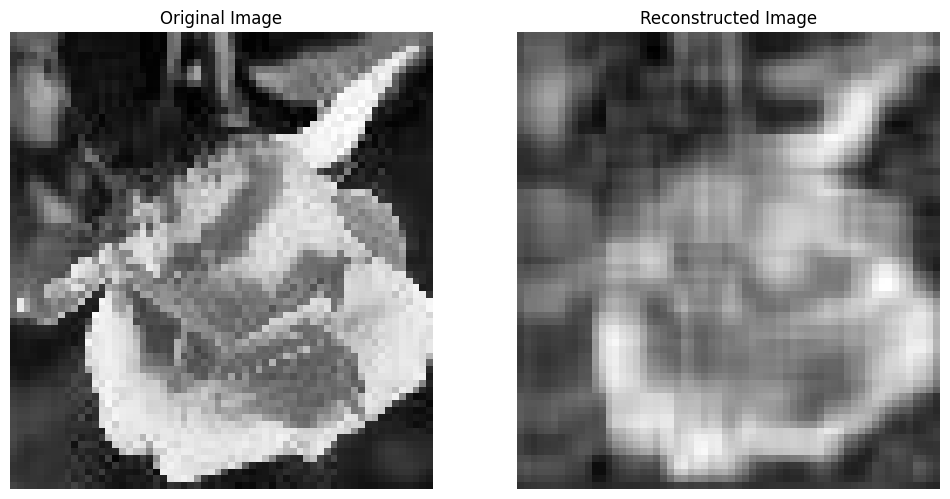

Table2: Original Dimensions: (67, 62)
Retained Dimension is : 10, Reconstruction Error is : 0.012891678815974993


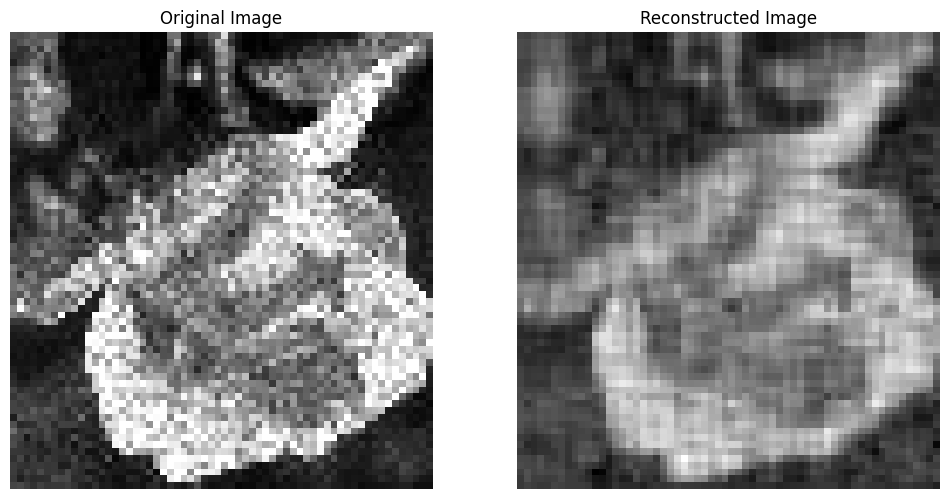

Table3: Original Dimensions: (67, 62)
Retained Dimension is : 29, Reconstruction Error is : 0.00033372834749878185


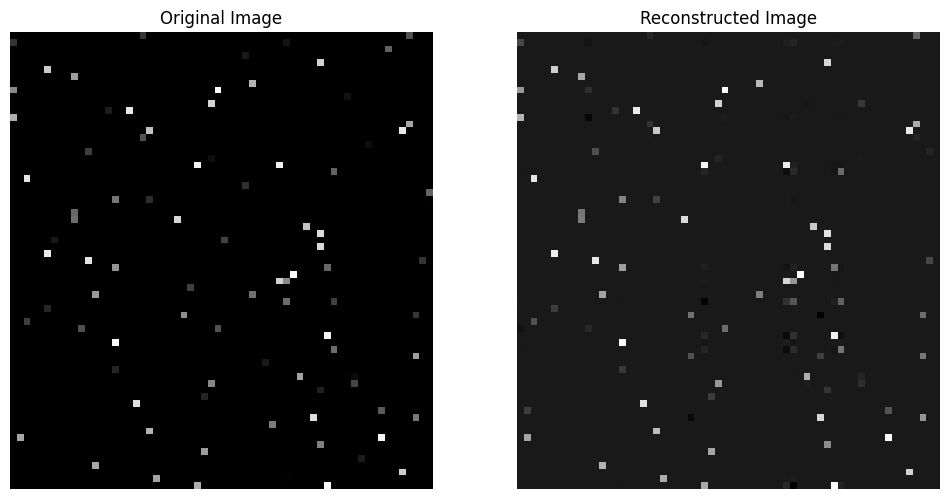

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define file paths for the datasets
file_paths = [
    '/Table1.txt',
    '/Table2.txt',
    '/Table3.txt'
]


def get_data(file_path):
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [list(map(float, line.split())) for line in lines]
    return np.array(data)

def dimensionality_reduction_svd(data, threshold=0.95):
    
    U, S, Vt = np.linalg.svd(data, full_matrices=False)
    total_energy = np.sum(S ** 2)
    energy_threshold = total_energy * threshold
    cumulative_energy = np.cumsum(S ** 2)
    retained_dimension = np.searchsorted(cumulative_energy, energy_threshold) + 1
    reduced_data = np.dot(U[:, :retained_dimension], np.dot(np.diag(S[:retained_dimension]), Vt[:retained_dimension, :]))
    return reduced_data, retained_dimension

def calculate_reconstruction_error(original_data, reconstructed_data):
    
    return np.mean((original_data - reconstructed_data) ** 2)

# Load datasets from file paths
datasets = [get_data(path) for path in file_paths]

# Define the threshold for energy retention
threshold = 0.95  # You can adjust this value as needed

# Process datasets
for data, name in zip(datasets, ['Table1', 'Table2', 'Table3']):
    print(f"{name}: Original Dimensions: {data.shape}")

    # Perform dimensionality reduction using SVD with threshold
    reduced_data, retained_dimension = dimensionality_reduction_svd(data, threshold)
    
    # Calculate reconstruction error
    reconstruction_error = calculate_reconstruction_error(data, reduced_data)
    
    print(f"Retained Dimension is : {retained_dimension}, Reconstruction Error is : {reconstruction_error}")
    
    # Plot original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(data, cmap='gray', interpolation='nearest')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reduced_data, cmap='gray', interpolation='None')
    plt.title('Reconstructed Image')
    plt.axis('off')
    
    plt.show()
